# **Library Importation and Setup**

In [ ]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Natural Language Processing (NLP)
import string
import re
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB # gen
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # gen
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Downloading and unzipping a dataset from Kaggle
!kaggle datasets download -d ibrahimkaratas/fakenews
!unzip fakenews

Dataset URL: https://www.kaggle.com/datasets/ibrahimkaratas/fakenews
License(s): unknown
 97% 45.0M/46.5M [00:01<00:00, 20.1MB/s]
100% 46.5M/46.5M [00:01<00:00, 28.2MB/s]
Archive:  fakenews.zip
  inflating: kaggle_fake_test/kaggle_fake_test.csv  
  inflating: kaggle_fake_train/kaggle_fake_train.csv  


In [ ]:
# Loading the data into a dataframe
filename = '/content/kaggle_fake_train/kaggle_fake_train.csv'
dataset = pd.read_csv(filename)

# **Data Exploration**

In [ ]:
# Checking the dataframe dimensions
dataset.shape

(20800, 5)

In [ ]:
# Previewing the dataframe
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
# Data Cleaning - column dropping
dataset.drop(['id'], axis=1, inplace=True)

In [ ]:
# Display dataframe information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   author  18843 non-null  object
 2   text    20761 non-null  object
 3   label   20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 650.1+ KB


Text(0, 0.5, 'Count')

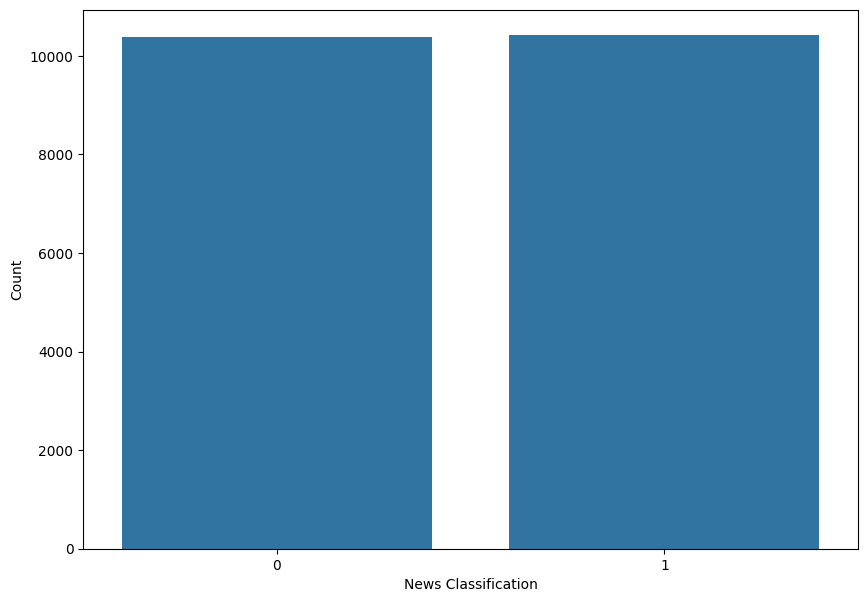

In [ ]:
# Creating a news classification distribution plot
plt.figure(figsize=(10,7))
sns.countplot(x='label', data=dataset)
plt.xlabel('News Classification')
plt.ylabel('Count')

Word cloud for text for true news.


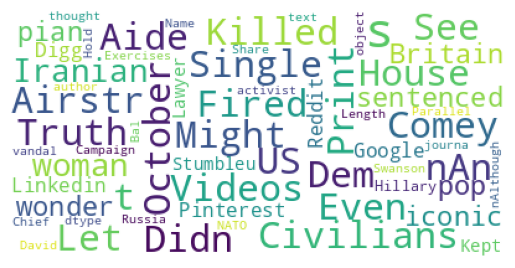

In [ ]:
# Generating a word cloud for "True News" articles and social media

print("Word cloud for text for true news.")

wordcloud2 = WordCloud(
                          background_color='white',
                          stopwords=STOPWORDS,
                          max_words=200,
                          max_font_size=40,
                          random_state=42
                         ).generate(str(dataset[dataset['label']==1]['text']))

plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

Word cloud for text for fake news.


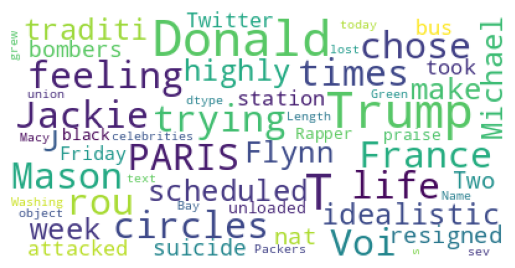

In [ ]:
# Generating a word cloud for "Fake News" articles and social media

print("Word cloud for text for fake news.")

wordcloud2 = WordCloud(
                          background_color='white',
                          stopwords=STOPWORDS,
                          max_words=200,
                          max_font_size=40,
                          random_state=42
                         ).generate(str(dataset[dataset['label']==0]['text']))

plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

# **Data Pre-processing and Cleaning**

In [ ]:
# Check if there's any null values in the dataset
print(dataset.isnull().sum())

title      558
author    1957
text        39
label        0
dtype: int64


In [ ]:
# Dropping null values
dataset.dropna(inplace=True)
print(dataset.shape)

(18285, 4)


In [ ]:
# Resetting the index of a dataframe
dataset.reset_index(inplace=True)

In [ ]:
# Define Stopwords
stop = set(stopwords.words('english'))

# Create Lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

# Create Tokenizer
wordTokenizer = nltk.tokenize.WhitespaceTokenizer()

In [ ]:
# Preprocessing Function
def Preprocessing(text):

    # convert to lowercase
    text = str(text).lower()

    # remove URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # remove extra spaces
    text = re.sub(' +',' ',text)

    # remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', ' ', str(text))

    # remove newline characters
    text = re.sub('\n', '', text)

    # lemmatize and remove stopwords
    text = ' '.join([lemmatizer.lemmatize(w) for w in wordTokenizer.tokenize(text) if (w not in stop)])
    return text

In [ ]:
# Applying the function (Preprocessing) on the dataset
dataset['cleanText'] = dataset['text'].apply(lambda x:Preprocessing(x))

Word cloud for text after removing stopwords.


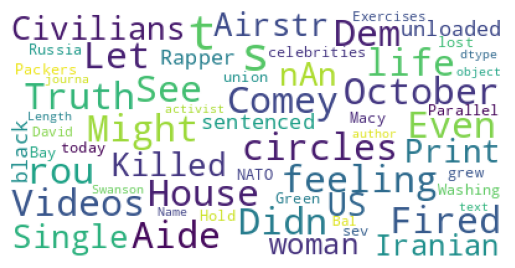

In [ ]:
# Generating a word cloud with stopword removed
print("Word cloud for text after removing stopwords.")
wordcloud2 = WordCloud(
                          background_color='white',
                          stopwords=STOPWORDS,
                          max_words=200,
                          max_font_size=40,
                          random_state=42
                         ).generate(str(dataset['text']))

plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [ ]:
# Viewing the dataframe after the preprocessing and the cleaning
dataset.head()

,index,title,author,text,label,cleanText
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide even see comey letter jason cha...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,ever get feeling life circle roundabout rather...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fired october tension intellig...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,video civilian killed single u airstrike ident...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,print iranian woman sentenced six year prison ...


# **Feature Extraction (TF-IDF vectors)**

In [ ]:
# Assigning features and target
X = dataset['cleanText']
y = dataset['label']

# Train and test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
''' In this is case: Training 70% , Testing 30% '''

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# **Model Training & Prediction**

## **SVM Classifier**

In [ ]:
# Define and train SVM classifier
svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)

# Make predictions on testing set
y_test_pred = svm_clf.predict(X_test)

# Printing the evaluate performance report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3107
           1       0.93      0.92      0.92      2379

    accuracy                           0.93      5486
   macro avg       0.93      0.93      0.93      5486
weighted avg       0.93      0.93      0.93      5486



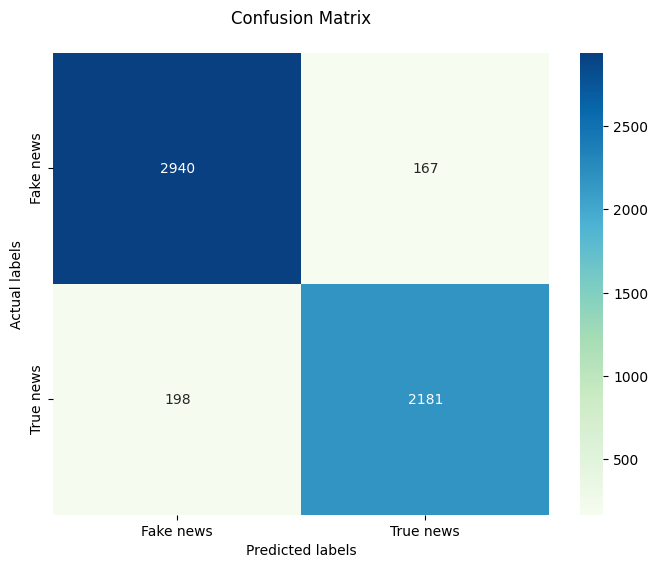

In [ ]:
# Visualization for SVM

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='GnBu', cbar=True,
            xticklabels=['Fake news', 'True news'],
            yticklabels=['Fake news', 'True news'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix\n')
plt.show()

## **Decision Tree Classifier**

In [ ]:
# Define and train Decision Tree classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# Make predictions on testing set
y_test_pred = dt_clf.predict(X_test)

# Printing the evaluate performance report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3107
           1       0.83      0.83      0.83      2379

    accuracy                           0.85      5486
   macro avg       0.85      0.85      0.85      5486
weighted avg       0.85      0.85      0.85      5486



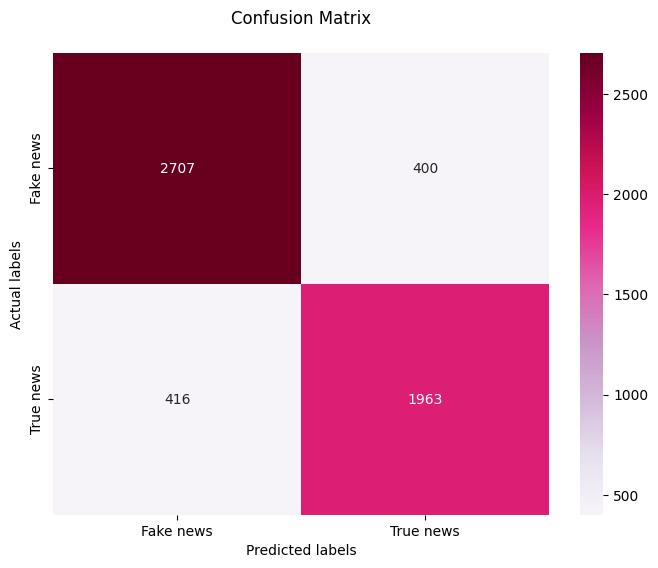

In [ ]:
# Visualization for Decision Tree

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuRd', cbar=True,
            xticklabels=['Fake news', 'True news'],
            yticklabels=['Fake news', 'True news'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix\n')
plt.show()

## **Naïve Bayes Classifier**

In [ ]:
# Define and train Naïve Bayes classifier
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

# Make predictions on testing set
y_test_pred = nb_clf.predict(X_test)

# Printing the evaluate performance report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3107
           1       0.91      0.74      0.82      2379

    accuracy                           0.86      5486
   macro avg       0.87      0.84      0.85      5486
weighted avg       0.86      0.86      0.85      5486



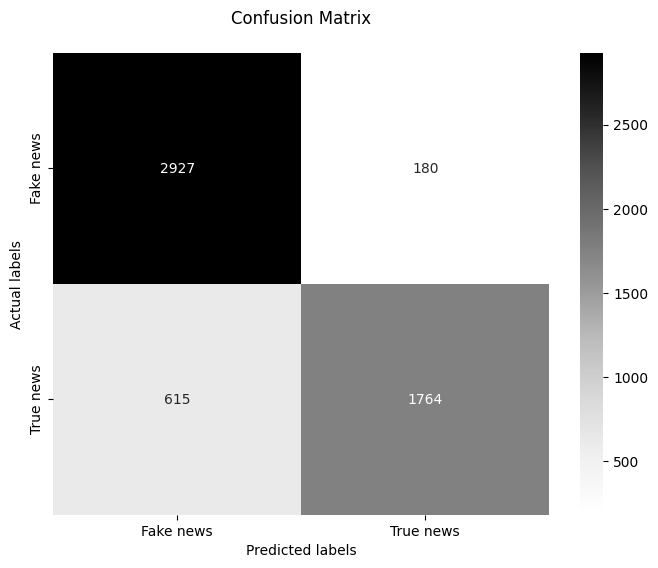

In [ ]:
# Visualization for Naïve Bayes

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', cbar=True,
            xticklabels=['Fake news', 'True news'],
            yticklabels=['Fake news', 'True news'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix\n')
plt.show()

## **Ensemble Learning: *Soft Voting Classifier***

In [ ]:
# Define SVM classifier
svm_bc = SVC(kernel='rbf', probability=True)

# Define Decision Trees classifier
dt_bc = DecisionTreeClassifier(max_depth=2, min_samples_split=5)

# Define Naïve Bayes classifier
nb_bs = MultinomialNB()

In [ ]:
# Create the soft voting classifier
voting_clf_bc = VotingClassifier(estimators=[('svm', svm_bc),
                                             ('dt', dt_bc),
                                             ('nb', nb_bs)],
                                voting='soft')

# Train the soft voting classifier
voting_clf_bc.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC(probability=True)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=2,
                                                     min_samples_split=5)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [ ]:
# Make predictions on testing set
y_pred = voting_clf_bc.predict(X_test)

In [ ]:
# Printing the evaluate performance report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3107
           1       0.93      0.90      0.92      2379

    accuracy                           0.93      5486
   macro avg       0.93      0.93      0.93      5486
weighted avg       0.93      0.93      0.93      5486



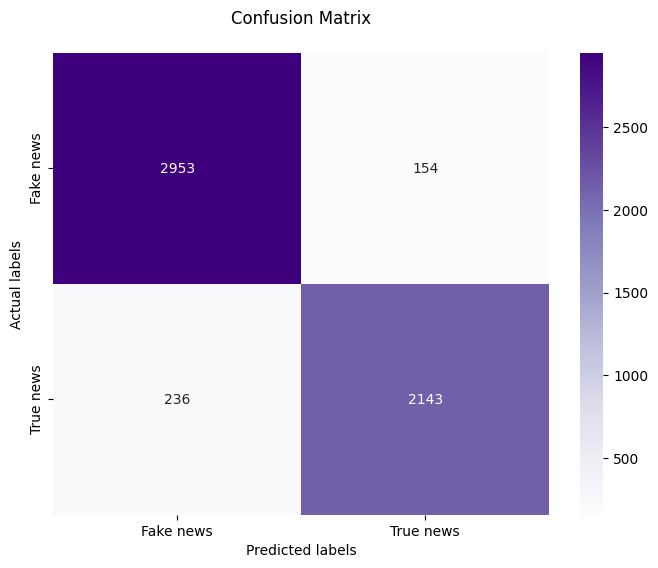

In [ ]:
# Visualization for Ensemble Learning

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=True,
            xticklabels=['Fake news', 'True news'],
            yticklabels=['Fake news', 'True news'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix\n')
plt.show()